# Predicting House Prices in California with `LinearRegression()`

In this lab you will start inspect, analyze, visualize house price data from different districts in California, US. After having performed analysis, EDA and some feature engineering, you will build your own `LinearRegression()`  with `SkLearn`. 

In [97]:
import sklearn
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
 

# Part 1 - Inspection and Cleaning


#### Import and Inspect your data

Read the `housing.csv` file and make use of some methods to understand your data better. Below is an explanation of the features you are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms** Sum of all rooms in district
5. **total_bedrooms** Sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district 
9. **median_house_value:** median house value in district
10. **ocean_proximity:** District´s proximity to the ocean

In [98]:
# load the data
df = pd.read_csv('../data/housing.csv')

In [99]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [100]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [101]:
for col in df.columns:
    print(f"{col}\n", df[col].describe(), "\n")

longitude
 count    20640.000000
mean      -119.569704
std          2.003532
min       -124.350000
25%       -121.800000
50%       -118.490000
75%       -118.010000
max       -114.310000
Name: longitude, dtype: float64 

latitude
 count    20640.000000
mean        35.631861
std          2.135952
min         32.540000
25%         33.930000
50%         34.260000
75%         37.710000
max         41.950000
Name: latitude, dtype: float64 

housing_median_age
 count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64 

total_rooms
 count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64 

total_bedrooms
 count    20433.000000
mean       537.870553
std        421.385070
min          1

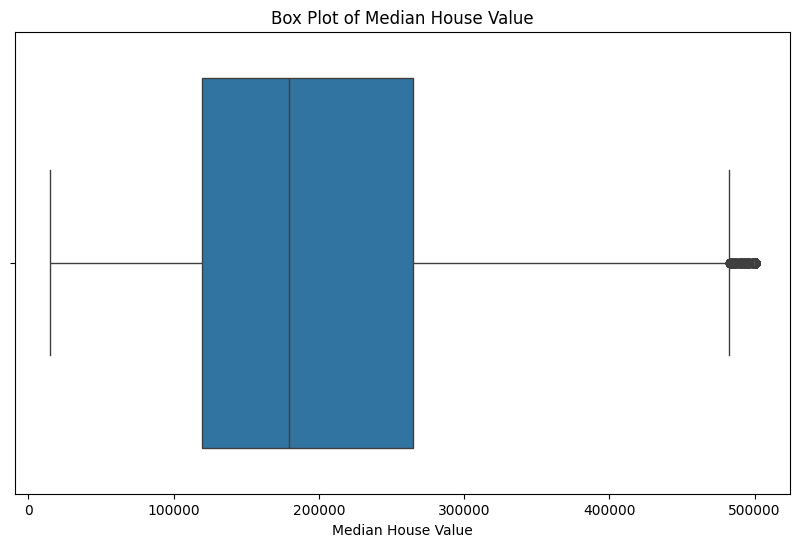

In [102]:
# do a box plot of the median_house_value column
plt.figure(figsize=(10,6))
sns.boxplot(x=df['median_house_value'])
plt.title('Box Plot of Median House Value')
plt.xlabel('Median House Value')
plt.show()

In [103]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

#### Histograms
Make histograms of all your numeric columns in order to get a good understanding of the distribution of your data points. What do you see?

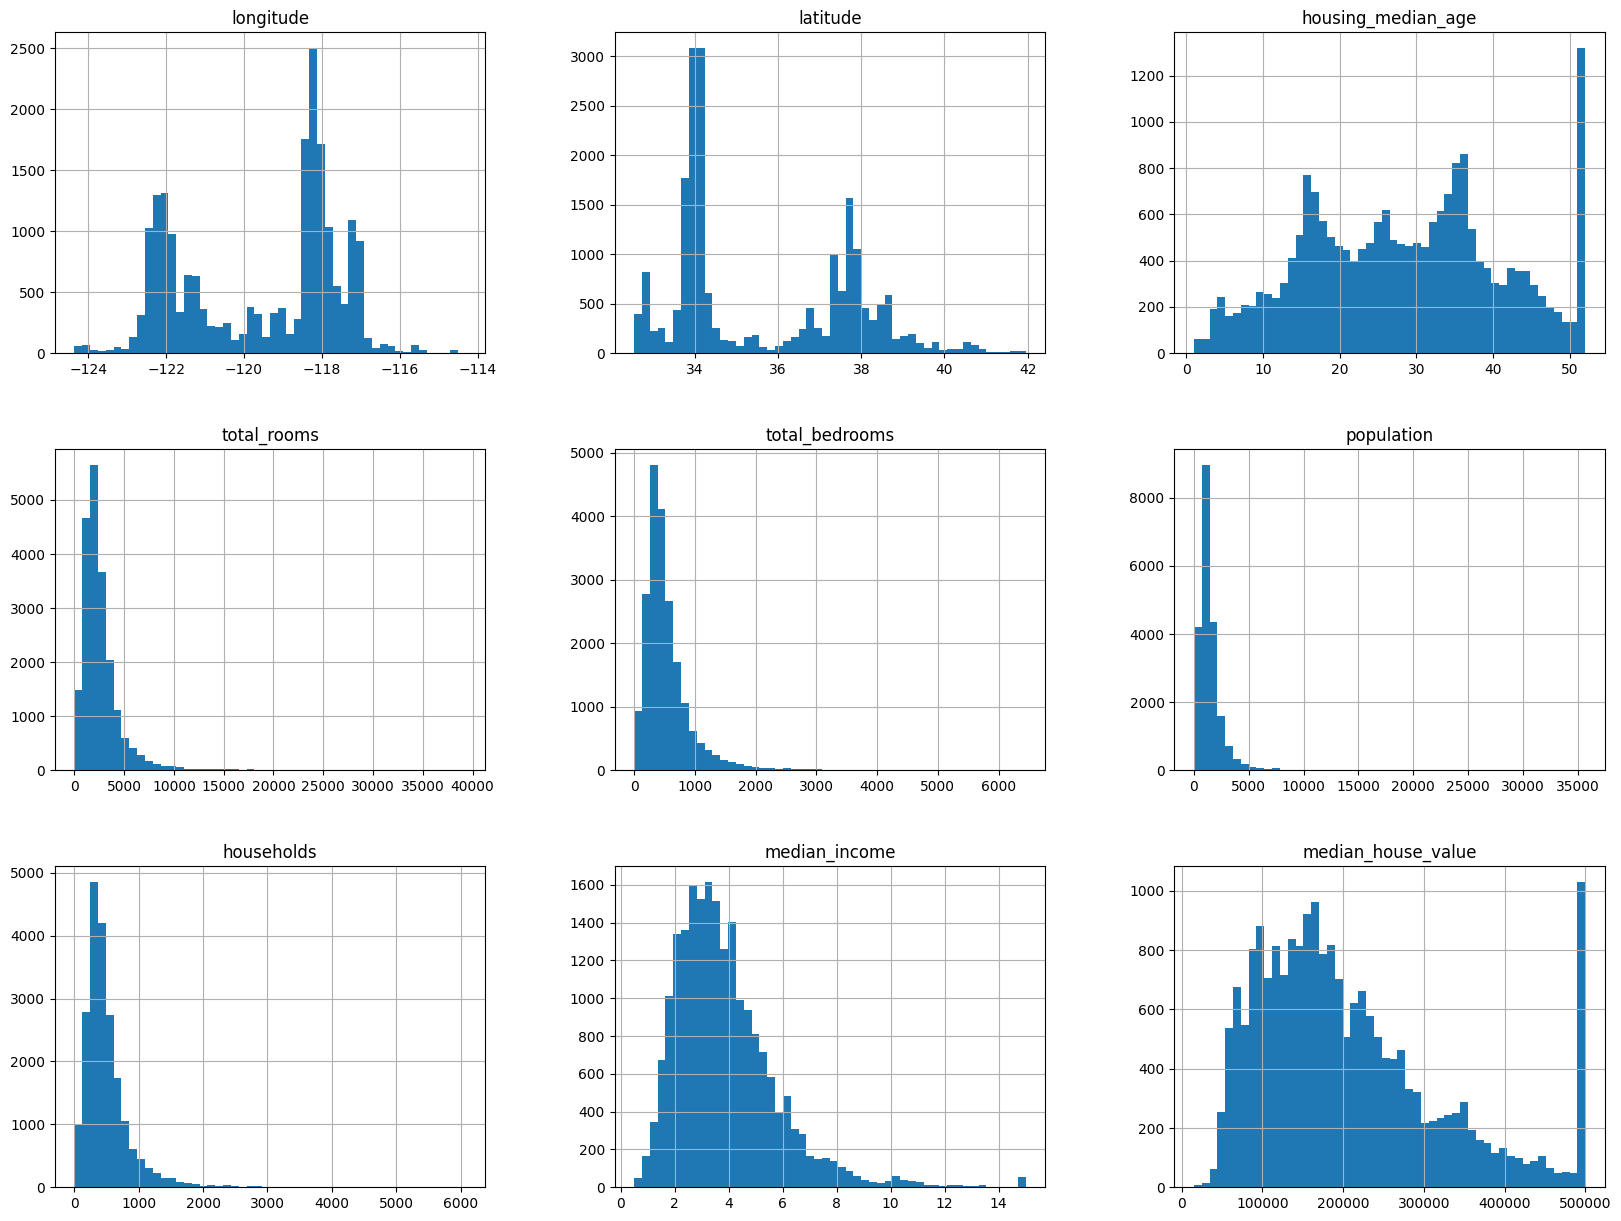

In [104]:
# create an histogram of all the numerical columns
df.hist(bins=50, figsize=(20,15))
plt.show()  

#### Let's create some features a tidy up our data

1. Locate your NaN values and make a decision on how to handle them. Drop, fill with mean, or something else, it is entirely up to you. 

In [105]:
# implement KNN imputer to fill missing values based on the 5 nearest neighbors
from sklearn.impute import KNNImputer, SimpleImputer

#imputer = KNNImputer(n_neighbors=5)
imputer = SimpleImputer(strategy='median')
df_imputed = imputer.fit_transform(df.select_dtypes(include=[np.number]))
df[df.select_dtypes(include=[np.number]).columns] = df_imputed

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


2. Create three new columns by using simple arithmetic operations. Create one column with "rooms per household", one with "population per household",  and one with "bedrooms per room".

In [107]:
# create rooms per household feature
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [108]:
# describe new features columns
for col in (['rooms_per_household', 'bedrooms_per_room', 'population_per_household']):
    print(f"{col}\n", df[col].describe(), "\n")

rooms_per_household
 count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: rooms_per_household, dtype: float64 

bedrooms_per_room
 count    20640.000000
mean         0.213794
std          0.065248
min          0.037151
25%          0.175225
50%          0.203159
75%          0.240126
max          2.824675
Name: bedrooms_per_room, dtype: float64 

population_per_household
 count    20640.000000
mean         3.070655
std         10.386050
min          0.692308
25%          2.429741
50%          2.818116
75%          3.282261
max       1243.333333
Name: population_per_household, dtype: float64 



In [109]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


3. If you check the largest and smallest values of your "rooms per houshold column" you will see two outliers and two values that are just wrong. Drop the four values by index.

In [110]:
#df.loc[(df[('bedrooms_per_room')] > 100) | (df[('bedrooms_per_room')] < 1)]

df.loc[df['rooms_per_household'] > 20, 'rooms_per_household'] = np.nan

In [111]:
df.loc[df['rooms_per_household'] < 1, 'rooms_per_household'] = np.nan

In [112]:
# after masking the outliers, we need to impute again the missing values
df_imputed = imputer.fit_transform(df.select_dtypes(include=[np.number]))
df[df.select_dtypes(include=[np.number]).columns] = df_imputed

# Part 2 - Exploratory Data Analysis



#### Let's find out what factors have an influence on our predicting variable

1. Let's check out the distribution of our "median house value". Visualize your results with 100 bins.

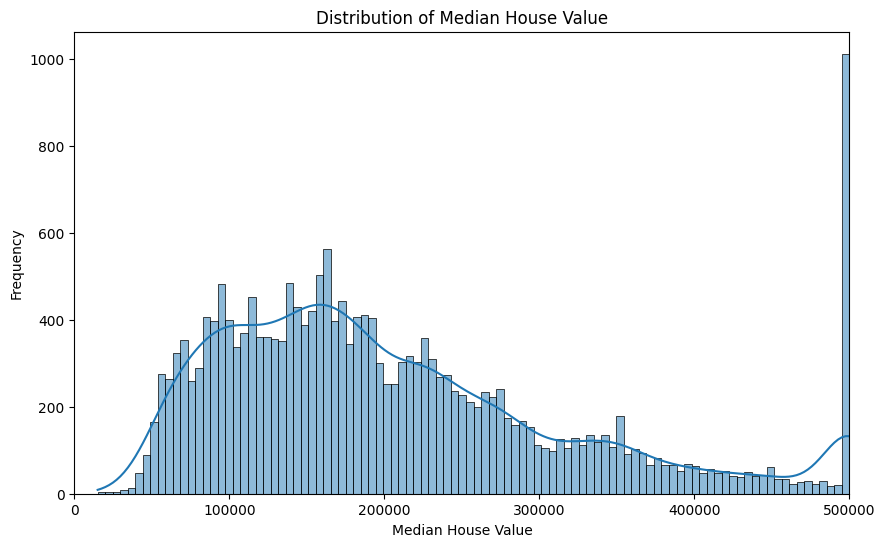

In [113]:
# check the distribution of median_house_value
plt.figure(figsize=(10,6))
sns.histplot(df['median_house_value'], bins=100, kde=True)
plt.xlim(0, 500000)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

2. Check out what variables correlates the most with "median house value"

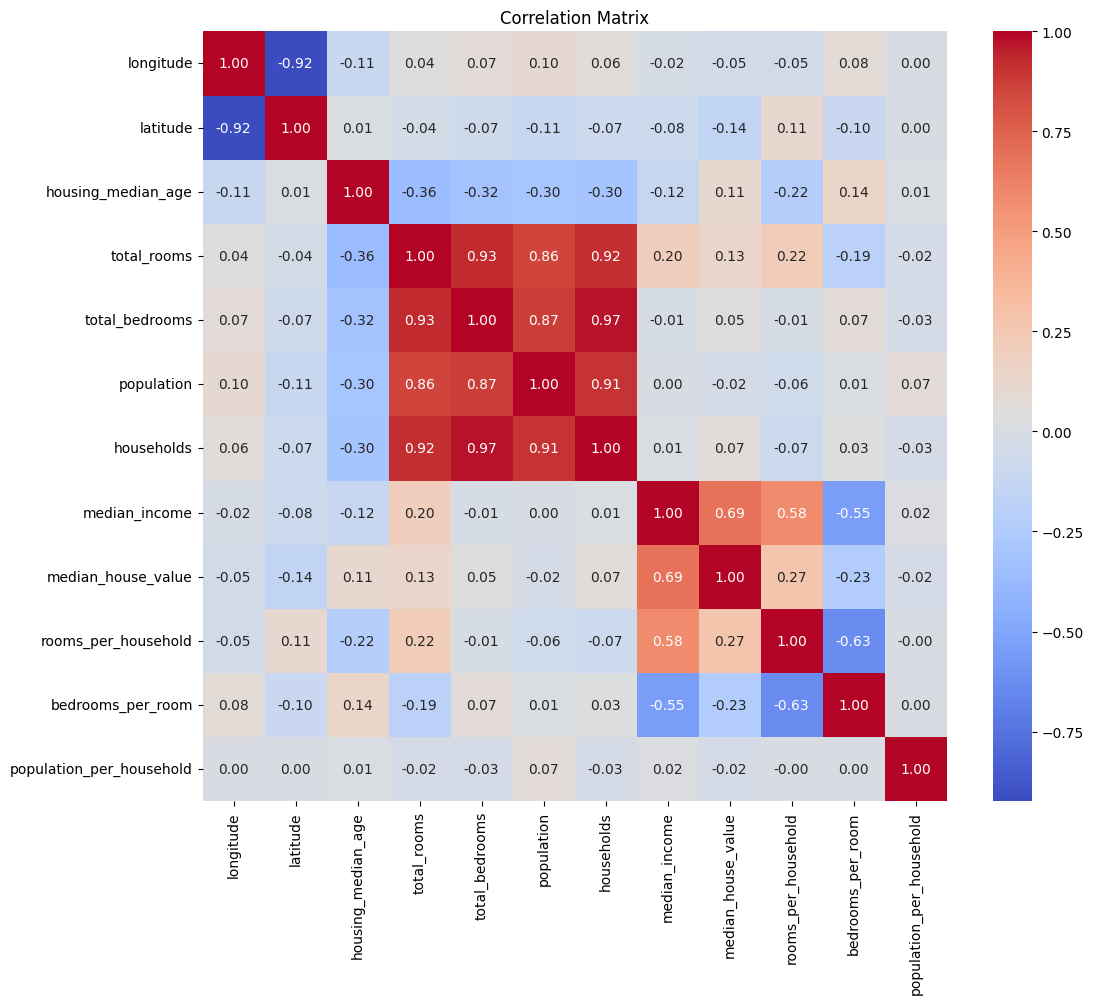

In [114]:
# headmap of the correlation matrix
plt.figure(figsize=(12,10))
# ciorrlation of all numerical columns

correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# the most correlated feature with median_house_value is median_income

3. Let's check out the distribution of the column that has the highest correlation to "median house value". Visualize your results with 100 bins.

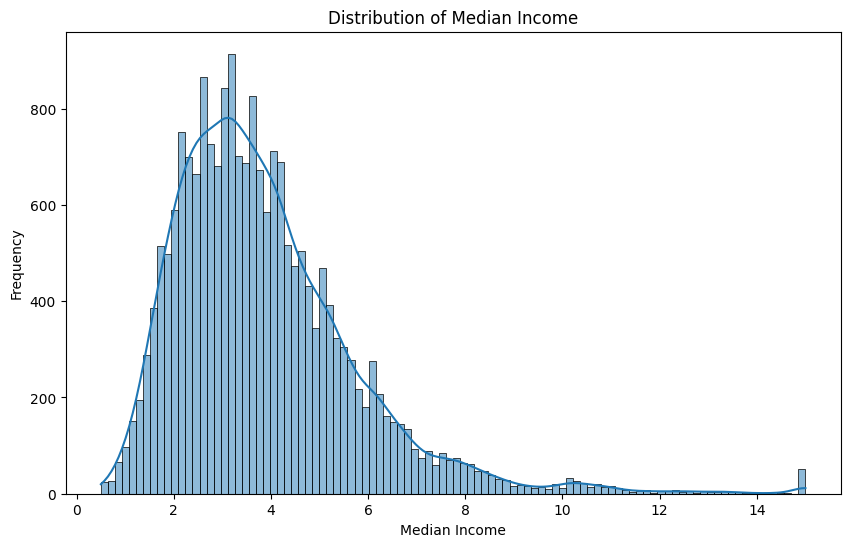

In [115]:
# check the distribution of median_income
plt.figure(figsize=(10,6))
sns.histplot(df['median_income'], bins=100, kde=True)
plt.title('Distribution of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

4. Visualize the "median house value" and "median income" in a jointplot (kind="reg"). What do you see?

(0.0, 15.0)

<Figure size 1000x600 with 0 Axes>

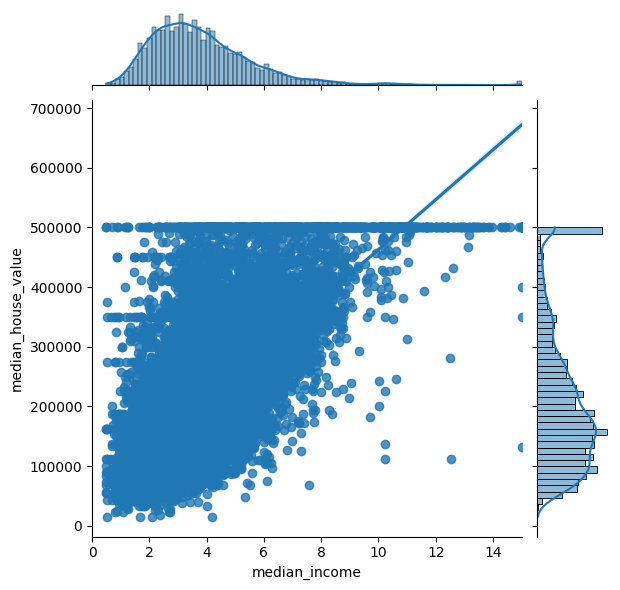

In [116]:
# vis the relationship between median_income and median_house_value in a jointplot
plt.figure(figsize=(10,6))
sns.jointplot(x='median_income', y='median_house_value', data=df, kind='reg')
plt.xlim(0, 15)

5. Make the same visualization as in the above, but, cahnge the kind parameter to "kde". What extra information does this type of visualization convey, that the one in the above does not?

(0.0, 15.0)

<Figure size 1000x600 with 0 Axes>

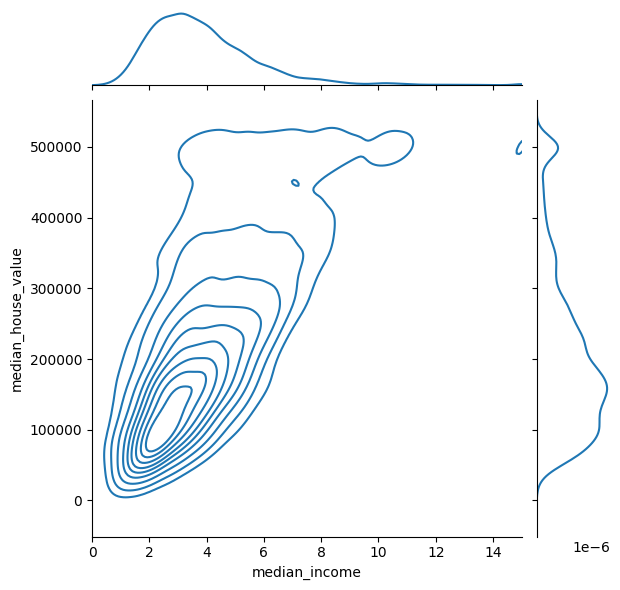

In [117]:
plt.figure(figsize=(10,6))
sns.jointplot(x='median_income', y='median_house_value', data=df, kind='kde')
plt.xlim(0, 15)

#### Let's get schwifty with some EDA

1. Create a new categorical column from the "median income" with the following quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]` and label them like this `["Low", "Below_Average", "Above_Average", "High", "Very High"]` and name the column "income_cat"

In [118]:
df['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [119]:
# print the 0.95 quantile of median_income
df['median_income'].quantile(0.95)

np.float64(7.300305)

In [120]:

df['income_cat'] = pd.cut(df['median_income'],
                          bins=[0.4999, 2.5633999999999997, 3.5347999999999997, 4.74325, 7.300305, 15.0001],
                          labels=["Low", "Below_Average", "Above_Average", "High", "Very High"])

2. Using the Seaborn library, plot the count of your new column and set the `hue` to "ocean_proximity". What interesting things can you see?

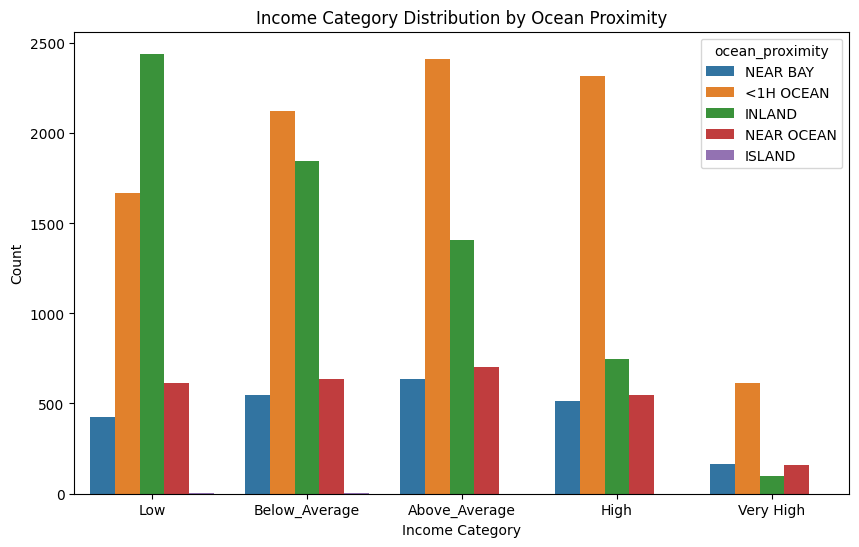

In [121]:
# plot the income category distribution and hue is ocean_proximity
plt.figure(figsize=(10,6))
sns.countplot(x='income_cat', data=df, hue='ocean_proximity')
plt.title('Income Category Distribution by Ocean Proximity')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

3. Create two barplots where you set "y="median_house_value" on both, and the x is first "income cat" and then "ocean_proximity". How does these two graphs complement what you saw in the graph in your previous question?

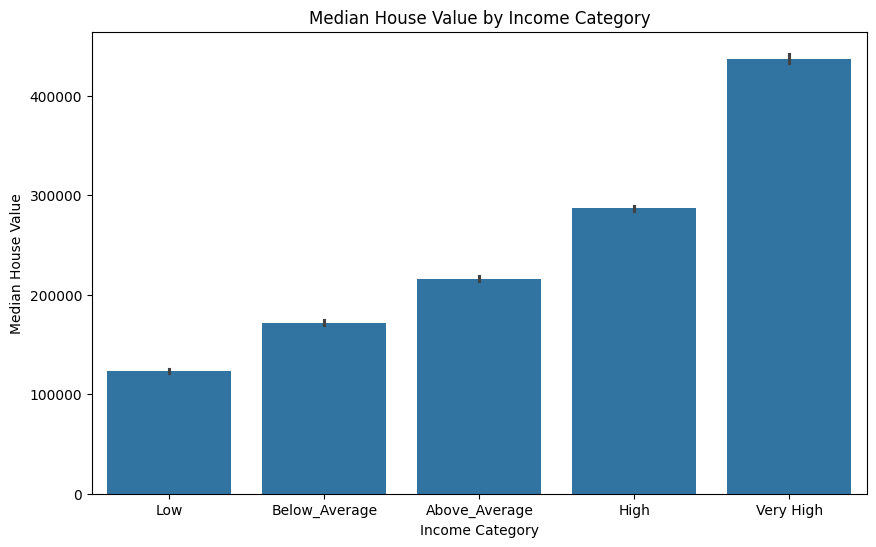

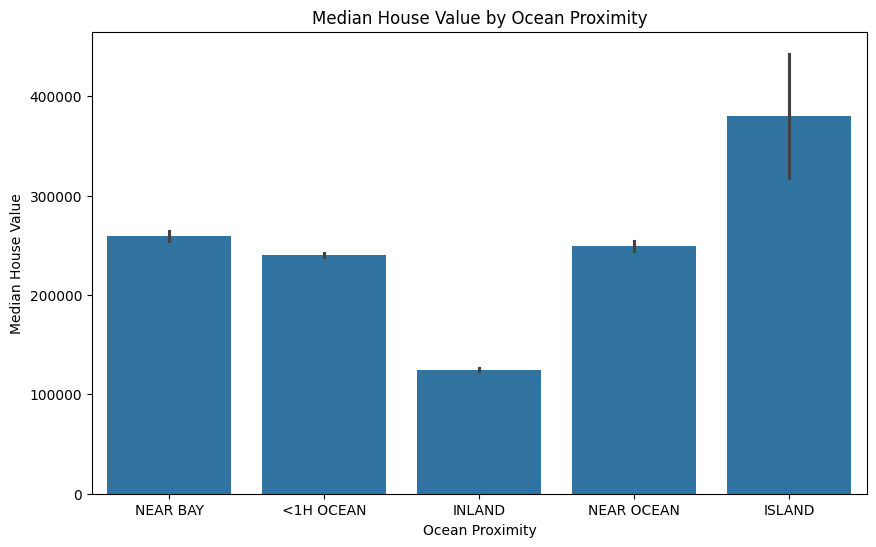

In [122]:
plt.figure(figsize=(10,6))
sns.barplot(x='income_cat', y='median_house_value', data=df)
plt.title('Median House Value by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Median House Value')
plt.show()
plt.figure(figsize=(10,6))
sns.barplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title('Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

4. Create a pivoted dataframe where you have the values of the "income cat" column as indices and the values of the "ocean_proximity" column as columns. Also drop the "ISLAND" column that you'll get.

In [123]:
pivot_df = df.pivot_table(index='income_cat', columns='ocean_proximity', values='median_income', aggfunc='count')
pivot_df = pivot_df.drop(columns=['ISLAND'], errors='ignore')
pivot_df

/var/folders/yg/6y123mkd6ygbljg34bxrpk4c0000gq/T/ipykernel_70852/2897621574.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(index='income_cat', columns='ocean_proximity', values='median_income', aggfunc='count')


ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,1666,2442,425,614
Below_Average,2125,1847,548,636
Above_Average,2412,1409,637,702
High,2318,749,514,547
Very High,612,96,165,159


5. Turn your pivoted dataframe into a heatmap. The heatmap should have annotations in integer format.

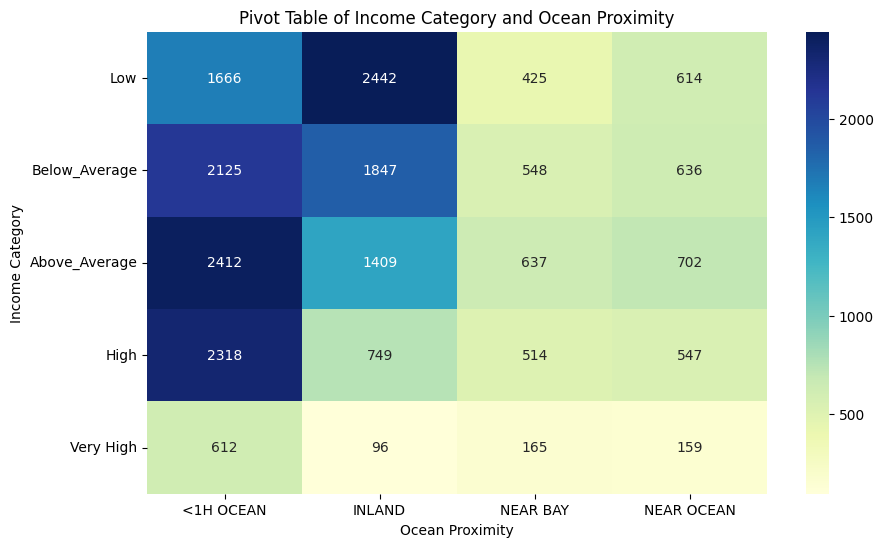

In [124]:
# head map of the pivoted dataframe
plt.figure(figsize=(10,6))
sns.heatmap(pivot_df, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Pivot Table of Income Category and Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Income Category')
plt.show()

# Part 3 - Preparing your Data



#### Splitting, Preparing and Engineering some Features

1. Let's drop the "income_cat" column as it has served its purpose already. We don't need for our model as we already have "median income".
Not dropping "incom cat" will lead to multicolinearity.

In [125]:
# drop the income_cat column
df.drop(columns=['income_cat'], inplace=True)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


2. Select your floating point columns and standardize your data by calculating the Z-score. You can apply the `stats.zscore()` method in a lambda function. Save your results to a variable called `z_scored`. 

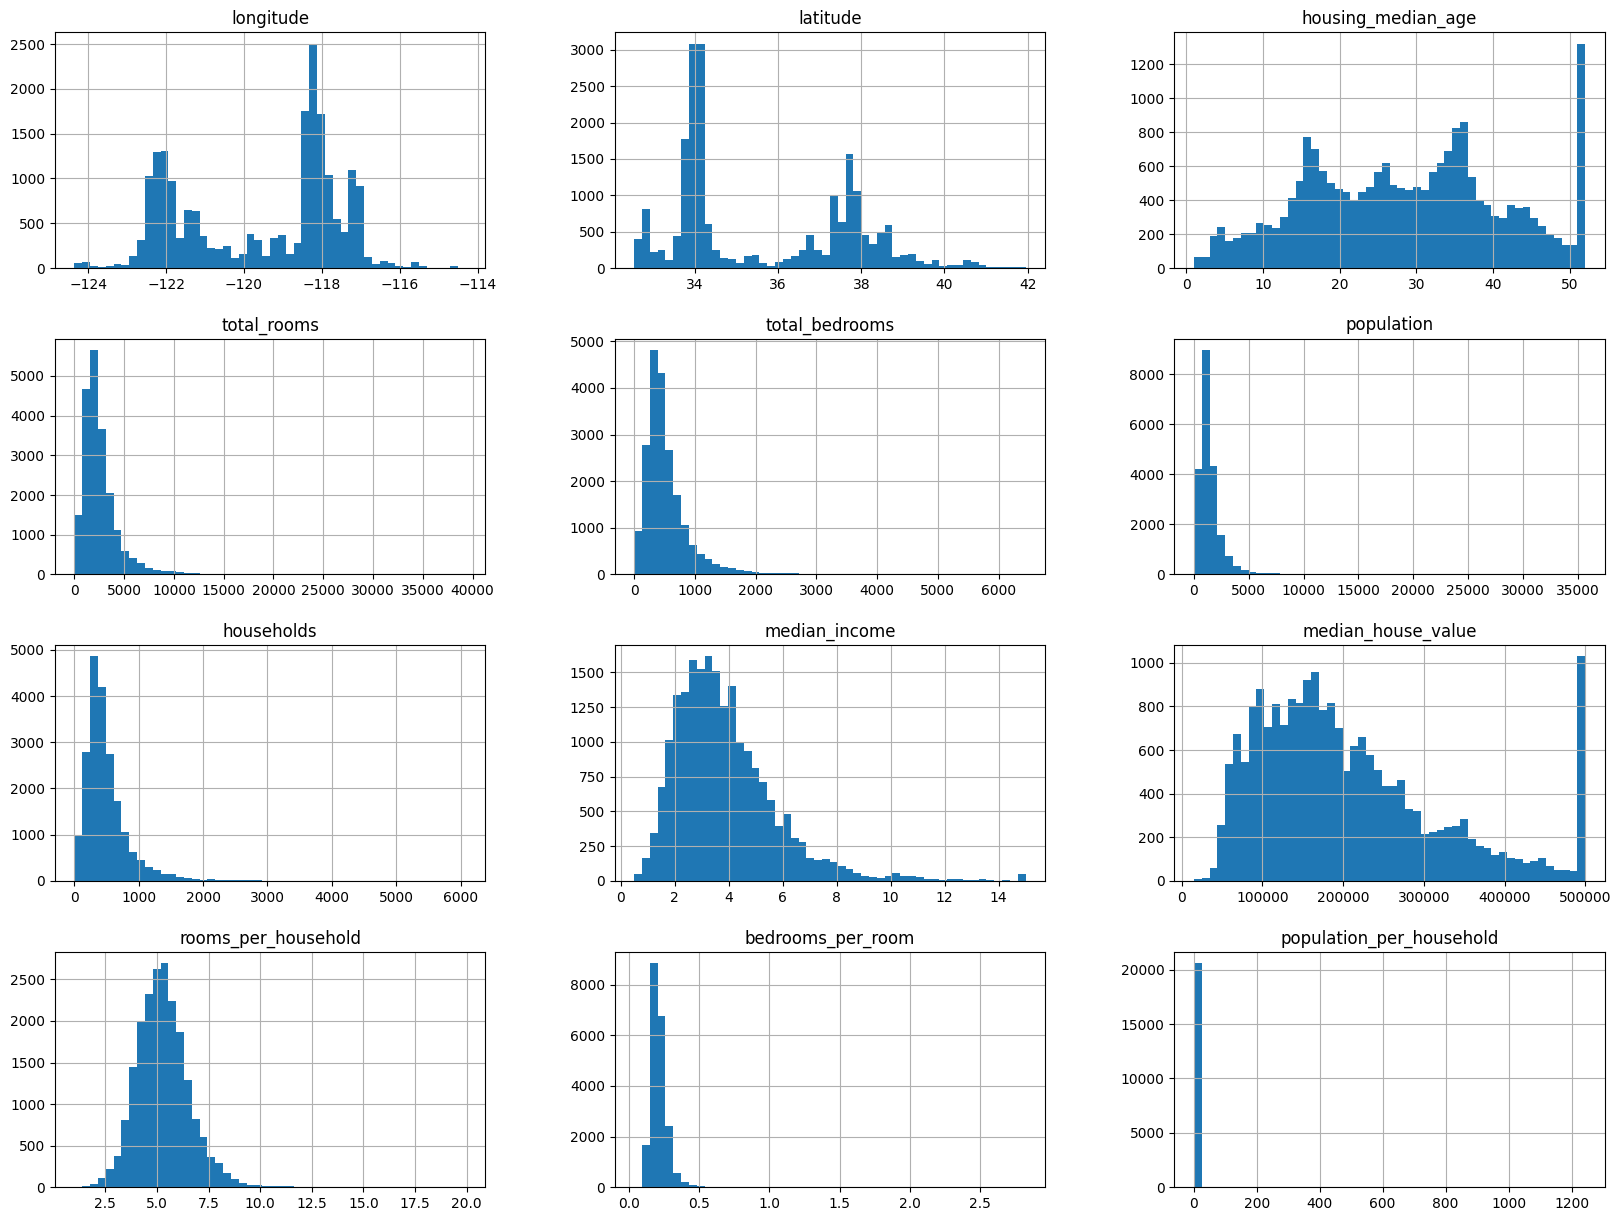

In [127]:
# create an histogram of all the numerical columns
df.hist(bins=50, figsize=(20,15))
plt.show() 

In [128]:
# do a log transformation on housing_median_age, total_rooms, total_bedrooms, population, households, median_income, rooms_per_household, bedrooms_per_room, population_per_household
for col in ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'median_house_value']:
    df[col] = np.log1p(df[col])

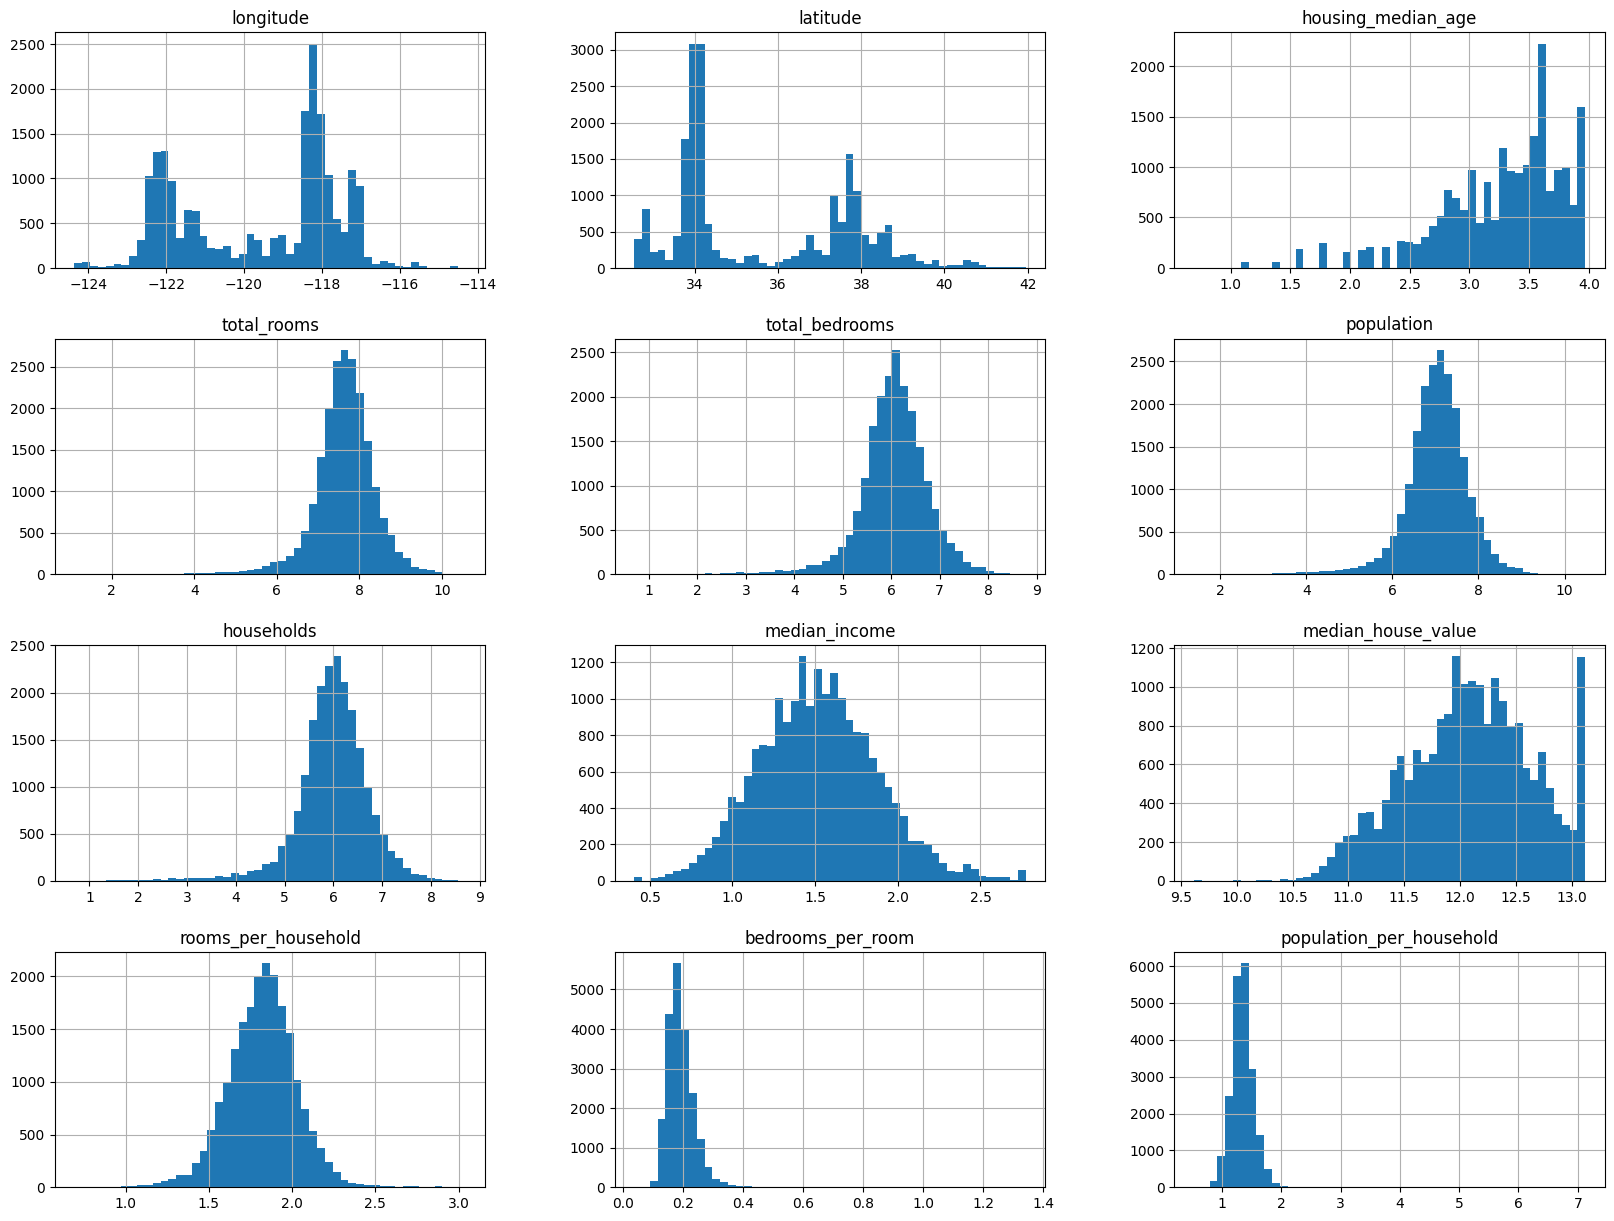

In [129]:
df.hist(bins=50, figsize=(20,15))
plt.show() 

In [130]:
import scipy.stats as stats
# standardize numerical columns with z-score
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df_zscored = df.copy()
df_zscored[num_cols] = df_zscored[num_cols].apply(stats.zscore)
df_zscored.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-1.327835,1.052548,0.876640,-1.131133,-1.642192,-1.694943,-1.569395,1.995505,1.647949,NEAR BAY,1.205370,-1.135825,-0.400594
1,-1.322844,1.043185,-0.340982,1.651357,1.320043,1.030337,1.449251,1.988380,1.238403,NEAR BAY,0.739891,-0.972736,-1.046006
2,-1.332827,1.038503,1.314676,-0.450310,-1.110094,-1.109604,-1.104849,1.656444,1.206751,NEAR BAY,1.923259,-1.441824,-0.077335
3,-1.337818,1.038503,1.314676,-0.638257,-0.817506,-0.949925,-0.813343,1.049948,1.152012,NEAR BAY,0.455679,-0.473153,-0.410919
4,-1.337818,1.038503,1.314676,-0.312370,-0.576140,-0.933021,-0.583469,0.170631,1.156639,NEAR BAY,0.768465,-0.687136,-0.936282


In [131]:

for col in df_zscored.columns:
    print(f"{col}\n", df_zscored[col].describe(), "\n")

longitude
 count    2.064000e+04
mean    -8.603626e-15
std      1.000024e+00
min     -2.385992e+00
25%     -1.113209e+00
50%      5.389137e-01
75%      7.784964e-01
max      2.625280e+00
Name: longitude, dtype: float64 

latitude
 count    2.064000e+04
mean     2.247298e-15
std      1.000024e+00
min     -1.447568e+00
25%     -7.967887e-01
50%     -6.422871e-01
75%      9.729566e-01
max      2.958068e+00
Name: latitude, dtype: float64 

housing_median_age
 count    2.064000e+04
mean     1.079584e-15
std      1.000024e+00
min     -4.856307e+00
25%     -6.170420e-01
50%      2.430507e-01
75%      6.881794e-01
max      1.314676e+00
Name: housing_median_age, dtype: float64 

total_rooms
 count    2.064000e+04
mean    -1.041028e-15
std      1.000024e+00
min     -8.708000e+00
25%     -4.679108e-01
50%      4.474966e-02
75%      5.673050e-01
max      3.933658e+00
Name: total_rooms, dtype: float64 

total_bedrooms
 count    2.064000e+04
mean     8.812933e-17
std      1.000024e+00
min     -7.415

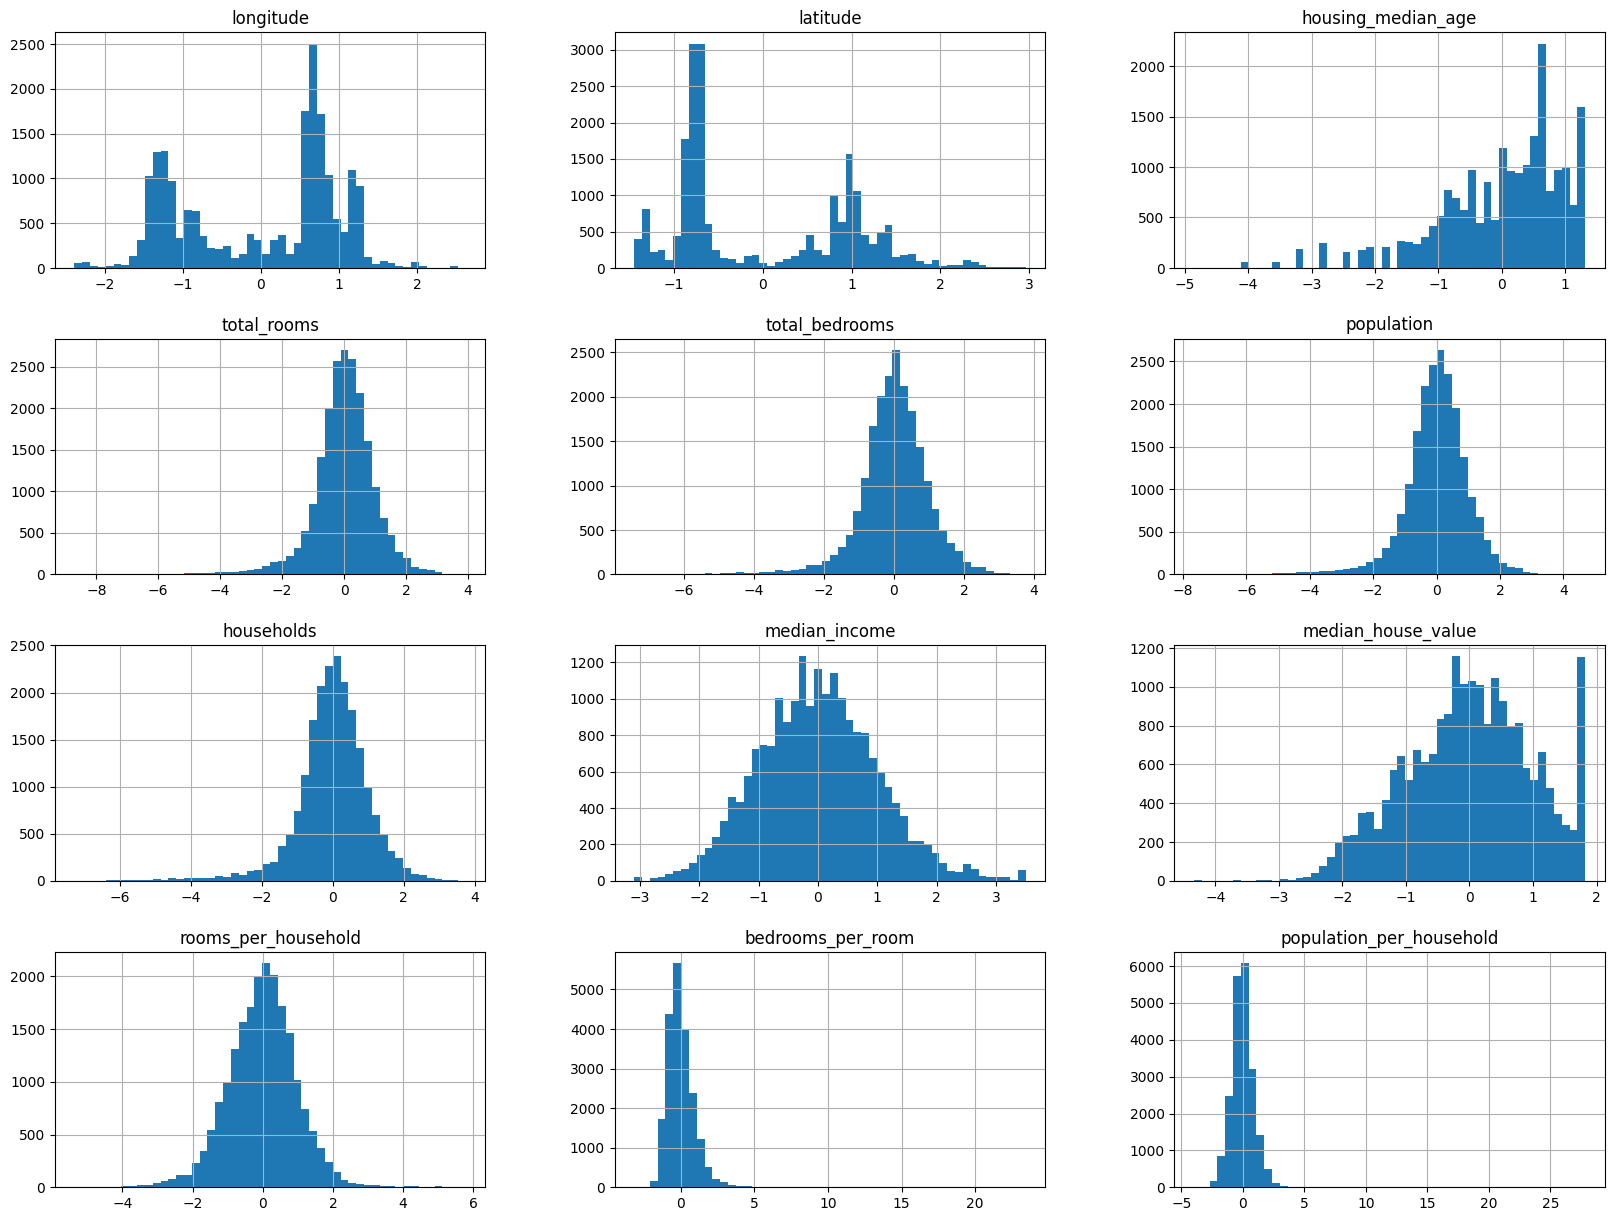

In [132]:
# no plot the numerical columns distributions after z-scoring
df_zscored[num_cols].hist(bins=50, figsize=(20,15))
plt.show()

3. Turn the only categorical columns into dummies. Be vary of the dummy trap, to avoid multicolinearity.

In [133]:
# turn ocean_proximity into dummies
df_final = pd.get_dummies(df_zscored, columns=['ocean_proximity'], drop_first=True)
df_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.876640,-1.131133,-1.642192,-1.694943,-1.569395,1.995505,1.647949,1.205370,-1.135825,-0.400594,False,False,True,False
1,-1.322844,1.043185,-0.340982,1.651357,1.320043,1.030337,1.449251,1.988380,1.238403,0.739891,-0.972736,-1.046006,False,False,True,False
2,-1.332827,1.038503,1.314676,-0.450310,-1.110094,-1.109604,-1.104849,1.656444,1.206751,1.923259,-1.441824,-0.077335,False,False,True,False
3,-1.337818,1.038503,1.314676,-0.638257,-0.817506,-0.949925,-0.813343,1.049948,1.152012,0.455679,-0.473153,-0.410919,False,False,True,False
4,-1.337818,1.038503,1.314676,-0.312370,-0.576140,-0.933021,-0.583469,0.170631,1.156639,0.768465,-0.687136,-0.936282,False,False,True,False


4. Save our predicting variable to `y`.

In [134]:
# y is median_house_value
y = df_final['median_house_value'].copy()


5. Concatenate `z_scored` and `dummies` and drop the predicting variable. Save to the varible `X`.

In [135]:
# X is the rest of the columns except median_house_value
X = df_final.drop(columns=['median_house_value']).copy()

# Part 4 - Machine Learning 




#### Train, Test, Split

1. Import `train_test_split` and split your data accordingly. Choose an appropriate test size.

In [ ]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Building and Training our Model

2. Build, fit and train a `LinearRegression` model. 

In [137]:
# fit a linear regression model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

3. In a scatterplot, visualize the y_train on your x-axis and your predictions on the y-axis. How does your training predictions look? 

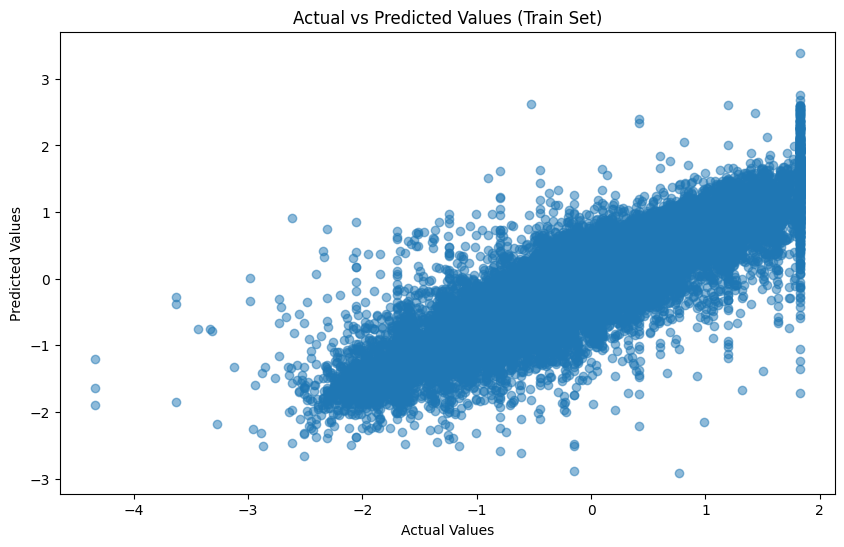

In [138]:
# on a scatter plot, plot from the train set the predicted vs actual values
y_train_pred = model.predict(X_train)
plt.figure(figsize=(10,6))
plt.scatter(x=y_train, y=y_train_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Train Set)')
plt.show()


4. From the sklearn metrics module, print the mean_squared_error and R^2-score. What does the metrics tell us?

In [139]:
from sklearn import metrics
# calculate the mean absolute error and the r2 score on the train set
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)
print(f"Train Set - Mean Absolute Error: {mae_train}")
print(f"Train Set - R2 Score: {r2_train}")

Train Set - Mean Absolute Error: 0.3965872915867648
Train Set - R2 Score: 0.7157569024996726


#### Final Predictions

1. Now you are ready to make prediction on the test data. Do that and visualize your results in a new scatterplot.

In [140]:
# predict on the test set
y_test_pred = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)
print(f"Test Set - Mean Absolute Error: {mae_test}")
print(f"Test Set - R2 Score: {r2_test}")

Test Set - Mean Absolute Error: 0.4210123327654211
Test Set - R2 Score: 0.6423707107631509


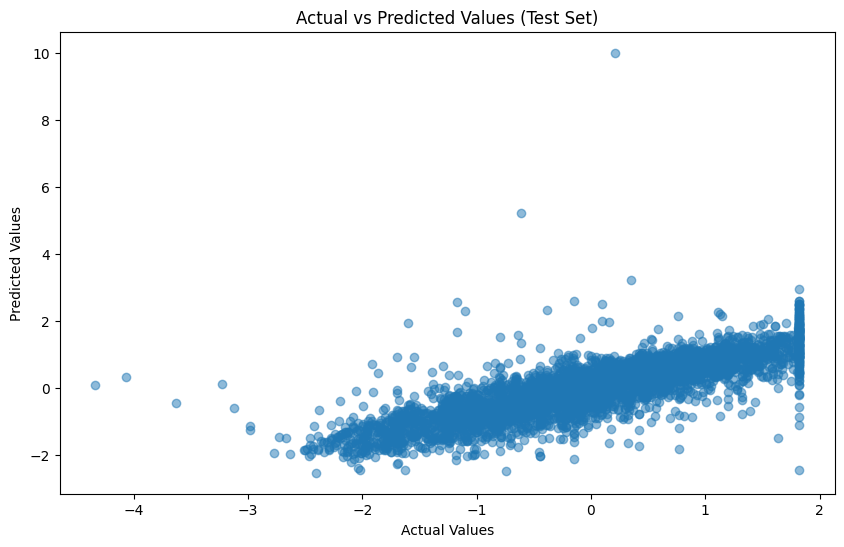

In [141]:
# plot the predicted vs actual values on the test set
plt.figure(figsize=(10,6))
plt.scatter(x=y_test, y=y_test_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

2. Print the mean_squared_error and R^2-score again. What has happened?

3. There is another metric called Root mean squared error, Which is the square root of the MSE. Calculate the RMSE.

In [142]:
# cal the RMSE on the test set
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print(f"Test Set - RMSE: {rmse_test}")
# now for the train
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print(f"Train Set - RMSE: {rmse_train}")


Test Set - RMSE: 0.5986369455040966
Train Set - RMSE: 0.5329965326895437


In [143]:
# lets try using a Ridge regression model
ridge_model = linear_model.Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_y_train_pred = ridge_model.predict(X_train)
ridge_mae_train = mean_absolute_error(y_train, ridge_y_train_pred)
ridge_r2_train = metrics.r2_score(y_train, ridge_y_train_pred)
print(f"Ridge Train Set - Mean Absolute Error: {ridge_mae_train}")
print(f"Ridge Train Set - R2 Score: {ridge_r2_train}")
# predict on the test set
y_test_pred = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)
print(f"Test Set - Mean Absolute Error: {mae_test}")
print(f"Test Set - R2 Score: {r2_test}")

Ridge Train Set - Mean Absolute Error: 0.39687032418960694
Ridge Train Set - R2 Score: 0.715669132308576
Test Set - Mean Absolute Error: 0.4210123327654211
Test Set - R2 Score: 0.6423707107631509


In [148]:
# lets to an alpha scread grid om the linear_model.Ridge to find the best one with r2 score on the test set
# grid sreach
from sklearn.model_selection import GridSearchCV

model = linear_model.Ridge()

param_grid = {
    #'alpha': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.75, 1.0, 1.5, 2.0, 5.0, 10.0]
    # alpha around 0.3
    'alpha': [0.28, 0.29, 0.3, 0.31, 0.32]
}

grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated R2 score: ", grid_search.best_score_)


Best parameters found:  {'alpha': 0.29}
Best cross-validated R2 score:  0.7144477855496232


In [151]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,1.267645,-1.367976,0.478737,0.557957,0.536057,0.971988,0.621211,-0.189088,-0.136414,-0.197506,0.935667,False,False,False,True
8267,0.703627,-0.871699,1.204954,0.662879,0.849943,0.212015,0.887080,0.151175,-0.586138,0.341068,-1.659470,False,False,False,True
17445,-0.454356,-0.455012,-3.130898,-0.107765,-0.345481,-0.279110,-0.226523,0.343560,0.334763,-0.645589,-0.178568,False,False,False,True
14265,1.227714,-1.377340,0.637962,-0.492761,-0.203103,0.315402,-0.151050,-1.220445,-1.012865,0.759727,1.236793,False,False,False,True
2271,-0.114948,0.537543,0.964239,0.195659,0.018653,-0.341309,-0.057660,-0.002635,0.759704,-0.533818,-0.760014,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.803453,-0.867017,0.586369,-0.580942,-1.032653,-0.726385,-0.825909,1.339461,0.667817,-1.055286,0.205671,False,False,False,False
11964,1.067992,-0.754652,0.478737,0.539926,0.404463,0.603287,0.171380,-0.329770,1.136204,-0.466843,1.149034,True,False,False,False
5390,0.593818,-0.749970,0.637962,0.028358,0.402038,0.605608,0.391338,-0.410509,-1.028161,0.962209,0.551260,False,False,False,False
860,-1.193070,0.912092,-0.940642,0.736858,0.468360,0.621746,0.472305,1.081706,0.841856,-0.776120,0.377791,False,False,False,False


In [156]:
# lets do the same with Lasso regression
model = linear_model.Lasso()

param_grid = {
    'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
    'max_iter': [6000, 7000, 8000, 9000, 10000]
}

grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated R2 score: ", grid_search.best_score_)


/Users/smithn5/ironhack/labs/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.344e+00, tolerance: 1.321e+00
  model = cd_fast.enet_coordinate_descent(


Best parameters found:  {'alpha': 0.0001, 'max_iter': 6000}
Best cross-validated R2 score:  0.7143537016616361


In [ ]:
# save the best model
best_model = grid_search.best_estimator_
# pridic)

# Bonus Questions 1

1. Create a dataframe with two columns, one consisting of the y_test and one of your model's predictions.

2. Make a series of of your new dataframe, by calculating the predicted error in absolut numbers. Save this series to variable name `absolute_errors`.

3. If you take the mean of your series, you will get the mean absolute errors, which is another metric for Linear Regressions.

# Bonus Question 2 - Build a Random Forest Regressor

1. Build, fit and train a `RandomForestRegressor` model. Do this by following the same staps that you followed when building your `LinearRegression`.

In [144]:
from sklearn.ensemble import RandomForestRegressor

2. Make prediction on the test data and evaluate you results.